# Concurrency and async / await

Details about the async def syntax for path operation functions and some background about asynchronous code, concurrency, and parallelism.

## In a hurry?¶

**TL;DR**:

If you are using third party libraries that tell you to call them with await, like:

In [1]:
results = await some_library()

NameError: name 'some_library' is not defined

Then, declare your path operation functions with async def like:

In [3]:
#@app.get('/')
async def read_results():
    results = await some_library()
    return results

In [4]:
read_results()

<coroutine object read_results at 0x105d14ba0>

`You can only use await inside of functions created with async def.`

If you are using a third party library that communicates with something (a database, an API, the file system, etc.) and doesn't have support for using await, (this is currently the case for most database libraries), then declare your path operation functions as normally, with just def, like:

In [5]:
#@app.get('/')
def results():
    results = some_library()
    return results

In [7]:
results()

NameError: name 'some_library' is not defined

## Technical Details

Modern versions of Python have support for "asynchronous code" using something called "coroutines", with async and await syntax.

Let's see that phrase by parts in the sections below:
- Asynchronous Code
- async and await
- Coroutines


### Asynchronous Code 

Asynchronous code just means that the language 💬 has a way to tell the computer / program 🤖 that at some point in the code, it 🤖 will have to wait for something else to finish somewhere else. Let's say that something else is called "slow-file" 📝.

So, during that time, the computer can go and do some other work, while "slow-file" 📝 finishes.

In [9]:
import asyncio

async def wait_and_print(message: str, delay: int):
  """
  This async function waits for a specified delay and then prints a message.
  """
  await asyncio.sleep(delay)  # Simulates asynchronous waiting
  print(message)

async def main():
  """
  This async function defines the tasks and runs them concurrently.
  """
  # Define two tasks with different messages and delays
  task1 = asyncio.create_task(wait_and_print("Hello from task 1!", 2))
  task2 = asyncio.create_task(wait_and_print("Hello from task 2!", 1))

  # Run the tasks concurrently using asyncio.gather
  await asyncio.gather(task1, task2)  # Wait for both tasks to finish

#if __name__ == "__main__":
  # Run the main coroutine
    #asyncio.run(main())

In [12]:
#asyncio.run(main())

main()

<coroutine object main at 0x105d17140>

In [15]:
import asyncio

async def wait_and_print(message: str, delay: int):
  """
  This async function waits for a specified delay and then prints a message.
  """
  await asyncio.sleep(delay)  # Simulates asynchronous waiting
  print(message)

async def main():
  """
  This async function defines the tasks and runs them concurrently.
  """
  # Define two tasks with different messages and delays
  task1 = asyncio.create_task(wait_and_print("Hello from task 1!", 2))
  task2 = asyncio.create_task(wait_and_print("Hello from task 2!", 1))

  # Run the tasks concurrently using asyncio.gather
  await asyncio.gather(task1, task2)  # Wait for both tasks to finish

# Call asyncio.run directly (assuming you're in a Jupyter Notebook environment)
#asyncio.run(main())


In [16]:
import asyncio

async def wait_and_print(message: str, delay: int):
  """
  This async function waits for a specified delay and then prints a message.
  """
  await asyncio.sleep(delay)  # Simulates asynchronous waiting
  print(message)

async def main():
  """
  This async function defines the tasks and runs them concurrently.
  """
  # Define two tasks with different messages and delays
  task1 = asyncio.create_task(wait_and_print("Hello from task 1!", 4))
  task2 = asyncio.create_task(wait_and_print("Hello from task 2!", 1))
  task3 = asyncio.create_task(wait_and_print("Hello from task 3!", 2))

  # Run the tasks concurrently using asyncio.gather
  await asyncio.gather(task1, task2, task3)  # Wait for both tasks to finish

# Call main directly with await (assuming you're in a Jupyter Notebook environment)
await main()

Hello from task 2!
Hello from task 3!
Hello from task 1!


#### Concurrency and Burgers

This idea of asynchronous code described above is also sometimes called "concurrency". It is different from "parallelism".

Concurrency and parallelism both relate to "different things happening more or less at the same time".



In [21]:
import threading
import time

def cook_food(customer_name, food_item, delay):
  """
  Simulates cooking food for a customer with a delay.
  """
  print(f"Cook started preparing {food_item} for {customer_name}")
  time.sleep(delay)  # Simulates cooking time
  print(f"Cook finished preparing {food_item} for {customer_name}")
  print()

def take_order(customer_name):
  """
  Simulates taking an order from a customer.
  """
  time.sleep(1)  # Simulates order taking time
  food_item = f"{customer_name}'s order"
  print(f"Order taken from {customer_name}: {food_item}")
  return food_item

def serve_customer(customer_name):
  """
  Simulates taking an order, cooking food, and serving a customer concurrently.
  """
  order_thread = threading.Thread(target=take_order, args=(customer_name,))
  order_thread.start()

  food_item = order_thread.join()  # Wait for order to be taken
  cook_thread = threading.Thread(target=cook_food, args=(customer_name, food_item, 2))
  cook_thread.start()

  # Simulate other tasks the main thread can do concurrently with cooking
  print(f"Main thread doing other tasks for {customer_name}")
  time.sleep(1)

  cook_thread.join()  # Wait for cooking to finish
  print(f"Served {food_item} to {customer_name}")
  print()
  

#if __name__ == "__main__":
#  customer1 = "Alice"
#  customer2 = "Bob"
#  serve_customer(customer1)  # Concurrently serve customer 1
#  serve_customer(customer2)  # Concurrently serve customer 2 (while serving customer 1)


In [22]:
customer1 = "Alice"
customer2 = "Bob"

serve_customer(customer1)  # Concurrently serve customer 1
serve_customer(customer2)  # Concurrently serve customer 2 (while serving customer 1)

Order taken from Alice: Alice's order
Cook started preparing None for Alice
Main thread doing other tasks for Alice
Cook finished preparing None for Alice

Served None to Alice

Order taken from Bob: Bob's order
Cook started preparing None for Bob
Main thread doing other tasks for Bob
Cook finished preparing None for Bob

Served None to Bob



But the details between concurrency and parallelism are quite different.

To see the difference, imagine the following story about burgers:

#### Concurrent Burgers¶
You go with your crush to get fast food, you stand in line while the cashier takes the orders from the people in front of you. 😍

https://fastapi.tiangolo.com/async/

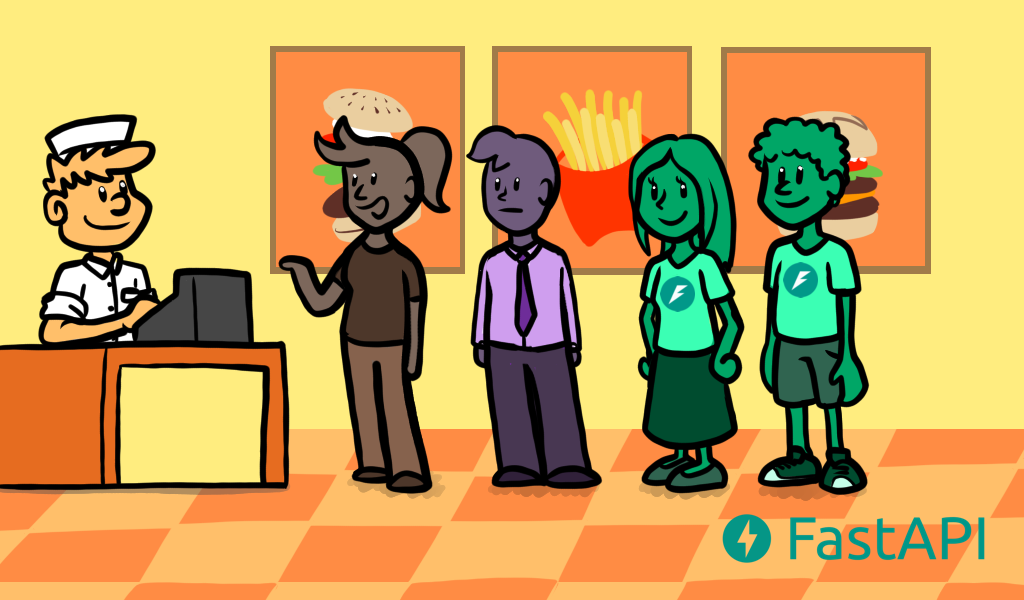

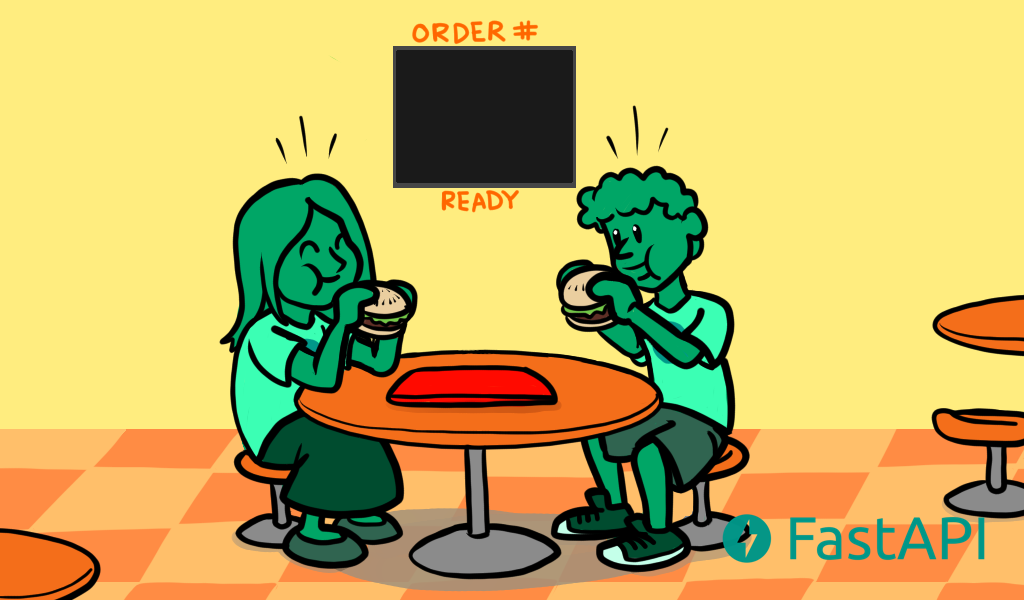

#### Parallel Burgers

Now let's imagine these aren't "Concurrent Burgers", but "Parallel Burgers".

You go with your crush to get parallel fast food.

You stand in line while several (let's say 8) cashiers that at the same time are cooks take the orders from the people in front of you.

Everyone before you is waiting for their burgers to be ready before leaving the counter because each of the 8 cashiers goes and prepares the burger right away before getting the next order.

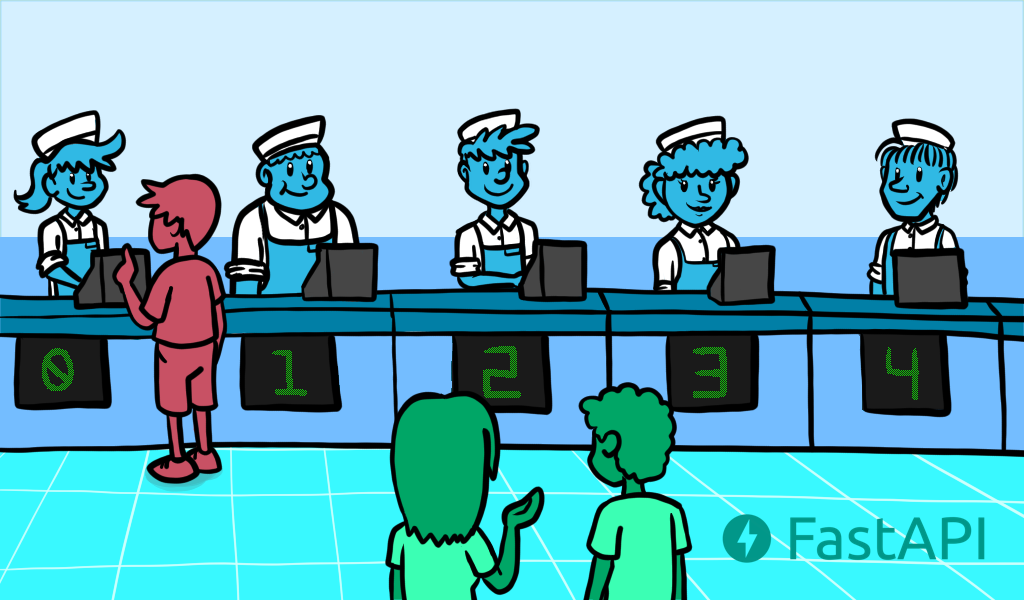

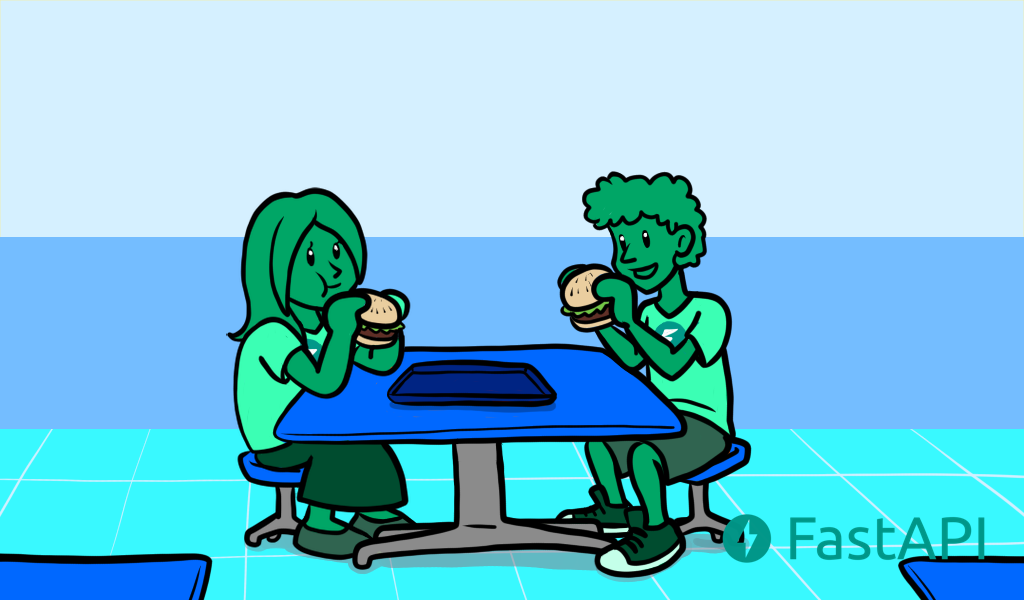

### async and await

Modern versions of Python have a very intuitive way to define asynchronous code. This makes it look just like normal "sequential" code and do the "awaiting" for you at the right moments.

When there is an operation that will require waiting before giving the results and has support for these new Python features, you can code it like:




In [24]:
burgers = await get_burgers(2)

NameError: name 'get_burgers' is not defined

The key here is the await. It tells Python that it has to wait ⏸ for get_burgers(2) to finish doing its thing 🕙 before storing the results in burgers. With that, Python will know that it can go and do something else 🔀 ⏯ in the meanwhile (like receiving another request).

For await to work, it has to be inside a function that supports this asynchronicity. To do that, you just declare it with async def:

In [25]:
async def get_burgers(number: int):
    # Do some asynchronous stuff to create the burgers
    return burgers

...instead of def:

In [26]:
# This is not asynchronous
def get_sequential_burgers(number: int):
    # Do some sequential stuff to create the burgers
    return burgers

With async def, Python knows that, inside that function, it has to be aware of await expressions, and that it can "pause" ⏸ the execution of that function and go do something else 🔀 before coming back.

When you want to call an async def function, you have to "await" it. So, this won't work:

In [27]:
# This won't work, because get_burgers was defined with: async def
burgers = get_burgers(2)

So, if you are using a library that tells you that you can call it with await, you need to create the path operation functions that uses it with async def, like in:

In [29]:
#@app.get('/burgers')
async def read_burgers():
    burgers = await get_burgers(2)
    return burgers

### Coroutines

**Coroutine** is just the very fancy term for the thing returned by an `async def function`. Python knows that it is something like a function that it can start and that it will end at some point, but that it might be paused ⏸ internally too, whenever there is an await inside of it.

But all this functionality of using asynchronous code with async and await is many times summarized as using "coroutines". It is comparable to the main key feature of Go, the "Goroutines".

### Conclusion 

Let's see the same phrase from above:

Modern versions of Python have support for "asynchronous code" using something called "coroutines", with async and await syntax.

That should make more sense now. ✨

All that is what powers FastAPI (through Starlette) and what makes it have such an impressive performance.

## Python Docs - asyncio

### asyncio — Entrées/Sorties asynchrones¶

https://docs.python.org/fr/3.10/library/asyncio.html

In [30]:
import asyncio

async def main():
    print('Hello ...')
    await asyncio.sleep(1)
    print('... World!')

asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [31]:
await main()

Hello ...
... World!


In [35]:
import asyncio
await asyncio.sleep(3, result='hello')
#'hello'

'hello'

### Coroutines et tâches 

Cette section donne un aperçu des API de haut-niveau du module asyncio pour utiliser les coroutines et les tâches.

https://docs.python.org/fr/3.10/library/asyncio-task.html

Coroutines declared with the async/await syntax is the preferred way of writing asyncio applications. For example, the following snippet of code prints "hello", waits 1 second, and then prints "world":

In [37]:
import asyncio

async def main():
    print('hello')
    await asyncio.sleep(1)
    print('world')

#asyncio.run(main())
await main()

hello
world


Appeler une coroutine ne la planifie pas pour exécution :

In [38]:
main()

<coroutine object main at 0x1061adf50>

Pour réellement exécuter une coroutine, asyncio fournit trois mécanismes principaux :

- La fonction `asyncio.run()` pour exécuter la fonction « main() », le point d'entrée de haut-niveau (voir l'exemple ci-dessus).

- Attendre une coroutine. Le morceau de code suivant attend une seconde, affiche « hello », attend 2 secondes supplémentaires, puis affiche enfin « world » :

In [39]:
import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(1, 'hello')
    await say_after(2, 'world')

    print(f"finished at {time.strftime('%X')}")

#asyncio.run(main())
await main()

started at 13:01:45
hello
world
finished at 13:01:48


La fonction asyncio.create_task() pour exécuter de manière concurrente des coroutines en tant que tâches asyncio.

Modifions l'exemple ci-dessus et lançons deux coroutines say_after de manière concurrente :


In [40]:
import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    task1 = asyncio.create_task(
        say_after(1, 'hello'))

    task2 = asyncio.create_task(
        say_after(2, 'world'))

    print(f"started at {time.strftime('%X')}")

    # Wait until both tasks are completed (should take
    # around 2 seconds.)
    await task1
    await task2

    print(f"finished at {time.strftime('%X')}")

#asyncio.run(main())
await main()

started at 13:03:05
hello
world
finished at 13:03:07


In [42]:
import asyncio
import datetime

async def display_date():
    loop = asyncio.get_running_loop()
    end_time = loop.time() + 5.0
    while True:
        print(datetime.datetime.now())
        if (loop.time() + 1.0) >= end_time:
            break
        await asyncio.sleep(1)

#asyncio.run(display_date())
await display_date()

2024-06-17 13:05:07.538007
2024-06-17 13:05:08.538735
2024-06-17 13:05:09.539429
2024-06-17 13:05:10.540625
2024-06-17 13:05:11.541341


In [43]:
import asyncio

async def factorial(name, number):
    f = 1
    for i in range(2, number + 1):
        print(f"Task {name}: Compute factorial({number}), currently i={i}...")
        await asyncio.sleep(1)
        f *= i
    print(f"Task {name}: factorial({number}) = {f}")
    return f

async def main():
    # Schedule three calls *concurrently*:
    L = await asyncio.gather(
        factorial("A", 2),
        factorial("B", 3),
        factorial("C", 4),
    )
    print(L)

#asyncio.run(main())
await main()

Task A: Compute factorial(2), currently i=2...
Task B: Compute factorial(3), currently i=2...
Task C: Compute factorial(4), currently i=2...
Task A: factorial(2) = 2
Task B: Compute factorial(3), currently i=3...
Task C: Compute factorial(4), currently i=3...
Task B: factorial(3) = 6
Task C: Compute factorial(4), currently i=4...
Task C: factorial(4) = 24
[2, 6, 24]
